In [13]:
import numpy as np
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

In [5]:
input_shape = (28, 28, 1)
num_of_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
# 1) normalize the input as the images are uint-8 and we want to convert them to float numbers from 0 to 1
# we apply the normalization for the stability, Consistent Scale and speeding the process and
# to make all pixel values lie within a consistent range which makes it easier for trainig the neural network

x_train  = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

In [7]:
# 2) edit the dimentions of the dataset images to be 3d

x_train  = np.expand_dims(x_train, -1) 
x_test  = np.expand_dims(x_test, -1) 

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# 3) using one hot coding(which represent the class labels numerically) to express the labels (output) to be like a vector holding the number of classes
# the class which the image belong will hold 1 and athore classes will hold zeros like: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# ensures that the neural network can effectively learn from categorical labels and make accurate predictions.(Categorical Representation, Loss Calculation, Output Layer Activation)

y_train = keras.utils.to_categorical(y_train,num_of_classes) # resulting shape will be (number_of_samples, num_of_classes)
y_test = keras.utils.to_categorical(y_test,num_of_classes)



In [9]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_of_classes, activation = "softmax"),])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# now we will train the model after building it 
# 1-compilation --> loss function: measures how well the model’s predictions match the true labels during training.("categorical_crossentropy" is used for multi-class classification)
#               --> optimizer: determines how the model’s weights are updated based on the loss function.("adam" adapts the learning rate during training.)
#               --> metrics:  additional evaluation ("accuracy" is common for classification tasks.)

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 2-training --> batch_size: The number of samples(images) processed before the model’s weights are updated.
#            --> epochs: The number of times the entire dataset is passed through the model during training.(number of iterations)
#            --> validation_split: splits a portion of the training data for validation (to monitor performance during training).

model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9881 - loss: 0.0361 - val_accuracy: 0.9918 - val_loss: 0.0277
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9895 - loss: 0.0329 - val_accuracy: 0.9915 - val_loss: 0.0277
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9923 - val_loss: 0.0286
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9928 - val_loss: 0.0262
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9928 - val_loss: 0.0281


In [18]:
# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Training accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

Training accuracy: 0.9962
Test accuracy: 0.9912


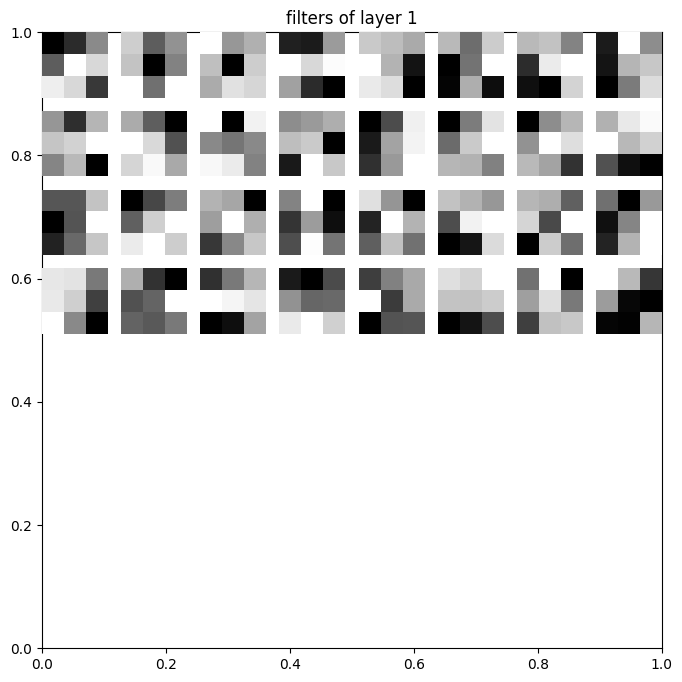

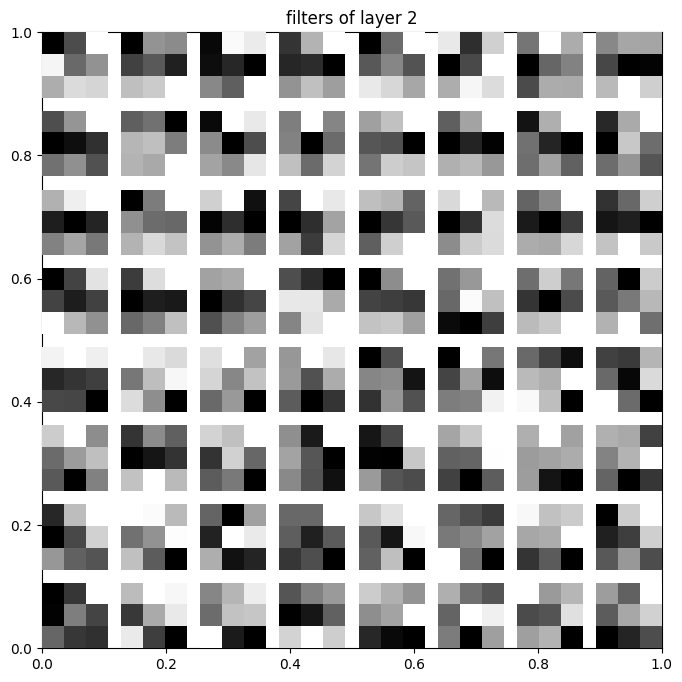

In [105]:
# it helps in understanding what the network has learned.
# These filters slide over the input image, computing a weighted sum of pixel values to create feature maps.

num_layers = len(model.layers)

for i in range(num_layers):
    
    # Check if it's a convolutional layer
    if 'conv' in model.layers[i].name:  

        # Get the weights of the first convolutional layer
        filters = model.layers[i].get_weights()[0] 

        # Determine the number of filters and channels in the filter
        num_filters = filters.shape[3]

        # in RGB images the number of channels are 3 which is red, green, blue
        # but here we use gray image so we have just 1 channel
        num_channels = filters.shape[2] 

        # Plot the filters
        plt.figure(figsize=(8, 8))

        if i == 0:
            plt.title(f"filters of layer {i+1}")
        if i == 2:
            plt.title(f"filters of layer {i}")

        # iterate over the num. of filters
        for j in range(num_filters):
            # filter_j --> holds the weights of each filter
            # : --> represents all the rows, columns, input channels respectively
            # j --> select the specific filter from all the filters
            filter_j = filters[:, :, :, j]
            # iterate over the num. of channels
            for k in range(num_channels):
                if num_filters <= 64 and j * num_channels + k + 1 <= 64:
                    # 4 --> no. of rows, 8 --> no. of columns, and i+1 --> no. of the index
                    plt.subplot(8, 8, j * num_channels + k + 1)
                    # filter_j[:, :, k] --> selects a specific channel (if we have multiple channels).
                    # in this case we can replace the j with 0 as we have just one channel (grayscale).
                    pyplot.imshow(filter_j[:, :, k], cmap='gray')
                    plt.axis('off')

        pyplot.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


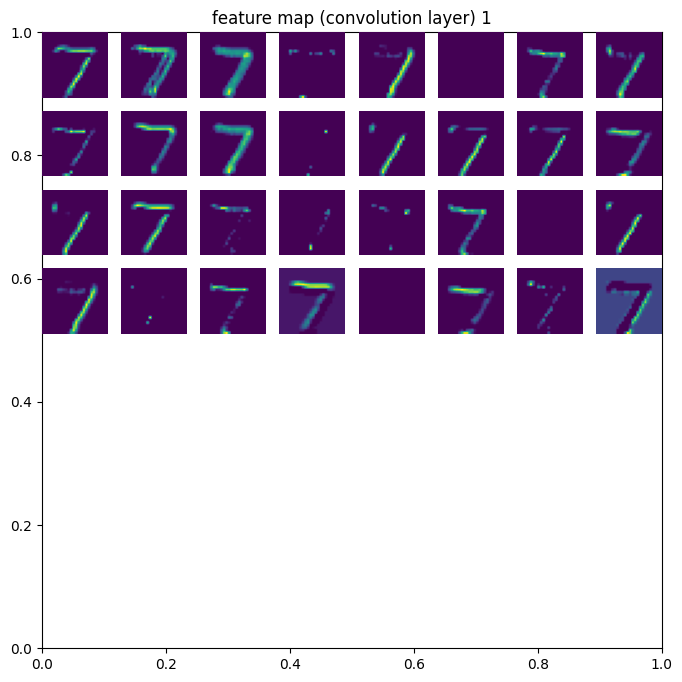

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


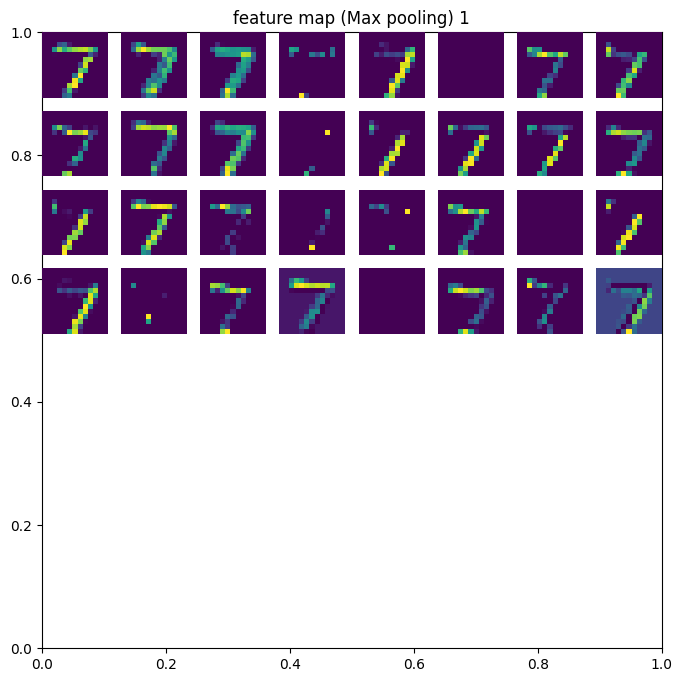

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


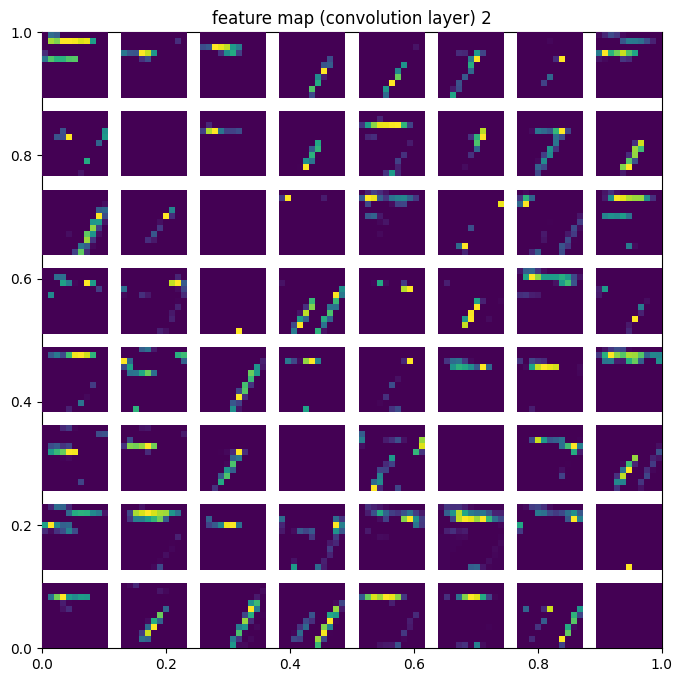

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


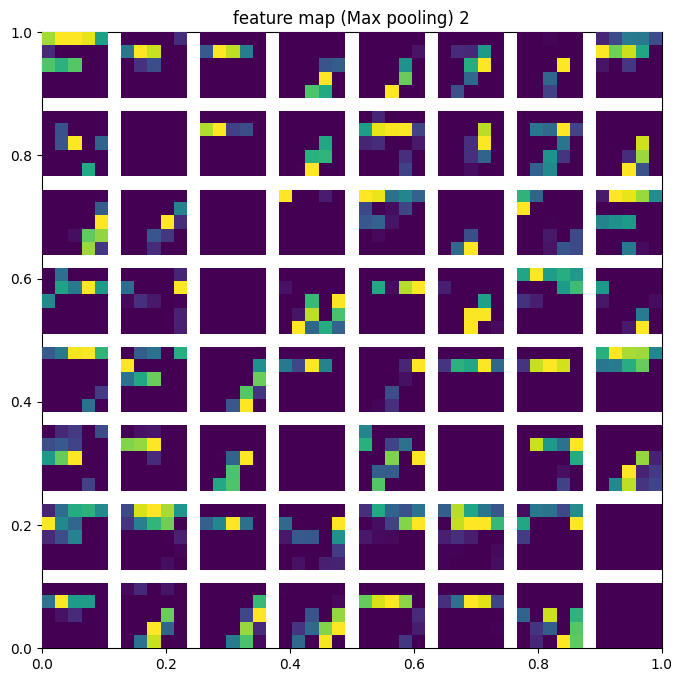

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

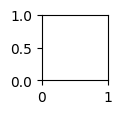

In [106]:
# the feature maps represent the output of each filter (kernel) in a convolutional layer.

num_layers = len(model.layers)

for i in range(num_layers):

    # craet a new model that takes the same input as the original model and produces the output of the first convolutional layer.
    model_layer = Model(inputs=model.inputs, outputs=model.layers[i].output)

    # Predict feature maps for a test image
    # x_test[:1] --> selects only the first sample (image) from the test dataset.
    feature_maps = model_layer.predict(x_test[:1])

    # Plot the feature maps 
    plt.figure(figsize=(8, 8))
    if 'conv' in model.layers[i].name: 
        if i == 0:
            plt.title(f"feature map (convolution layer) {i+1}")
        if i == 2:
            plt.title(f"feature map (convolution layer) {i}")
    
    else:
        if i == 1:
            plt.title(f"feature map (Max pooling) {i}")
        if i == 3:
            plt.title(f"feature map (Max pooling) {i-1}")

    # feature_maps.shape[-1] --> retrieves the value of the last dimension (number of filters or feature maps).
    # -1 --> refers to the last element in the tuple(group). (regardless of the number of dimensions)
    for j in range(feature_maps.shape[-1]):
        plt.subplot(8, 8, j + 1)
        # feature_maps[0, :, :, i] --> selects the i-th feature map corresponding to the i-th filter for the first input image.([batch_size, height, width, num_filters])
        # 0 --> Refers to the first sample (image) in the batch. If we have multiple images, we can replace 0 with the index of the desired image.
        # in this case we just have 1 sample image so the index of it is 0.
        # cmap='viridis'--> specifies the color map for visualization.
        plt.imshow(feature_maps[0, :, :, j], cmap='viridis')
        plt.axis('off')

    plt.show()
    
